In [1]:
# Import Python libraries for visualisation and data analysis
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# sns.set_theme()  # Apply the default Seaborn theme
%matplotlib inline

# Suppress warnings to avoid potential confusion
import warnings
from statsmodels.tsa.stattools import adfuller
# Libraries for statistical and scientific computing
import statsmodels.api as sm
from scipy import stats

warnings.filterwarnings("ignore")
import ipywidgets as widgets
from IPython.display import display

In [2]:
d1=pd.read_csv('2020.csv')  
# d1.set_index('date',inplace=True)
d2=pd.read_csv('2021.csv')  
# d2.set_index('date',inplace=True)
d3=pd.read_csv('2022.csv')  

# d3.set_index('date',inplace=True)

In [3]:
def subperiod_mobility_trends(data, start_date, end_date):
    """
    Add your mobility data in `data`.

    This function selects a subperiod of the mobility data based on prespecified start data and end date.
    """
    subdata= data[
        data["date"].isin(pd.date_range(start=start_date, end=end_date))
    ]
    return subdata


def rename_mobility_trends(data):
    """
    This function renames the column headings of the six mobility categories.
    """
    data = data.rename(
        columns={
            "retail_and_recreation_percent_change_from_baseline": "Retail_Recreation",
            "grocery_and_pharmacy_percent_change_from_baseline": "Grocery_Pharmacy",
            "parks_percent_change_from_baseline": "Parks",
            "transit_stations_percent_change_from_baseline": "Transit_stations",
            "workplaces_percent_change_from_baseline": "Workplaces",
            "residential_percent_change_from_baseline": "Residential",
        }
    )
    return data

In [4]:
d1=rename_mobility_trends(d1)
d2=rename_mobility_trends(d2)
d3=rename_mobility_trends(d3)

In [5]:
data=d1.append(d2)
data=data.append(d3)

In [6]:
tower=data[data["sub_region_2"] == "London Borough of Tower Hamlets"]

In [13]:
 tower.set_index('date',inplace=True)

In [14]:
Retail_Recreation=tower['Retail_Recreation']

In [15]:
result = adfuller(Retail_Recreation, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')   

ADF Statistic: -2.7192203047860866
n_lags: 0.07077096086586578
p-value: 0.07077096086586578
Critial Values:
   1%, -3.4389722010249386
Critial Values:
   5%, -2.8653454308425705
Critial Values:
   10%, -2.5687964010457227


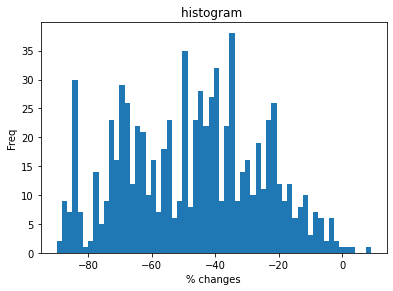

In [16]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.hist(Retail_Recreation, bins = 60)
ax1.set_xlabel('% changes')
ax1.set_ylabel("Freq")
ax1.set_title("histogram ")
plt.show();
    

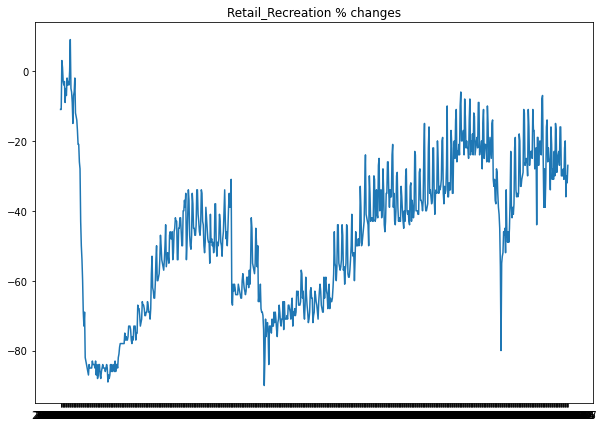

In [17]:
get_ipython().run_line_magic('matplotlib', 'inline')
fig, axes = plt.subplots(figsize=(10,7))
plt.plot(Retail_Recreation);
plt.title('Retail_Recreation % changes');
        

In [18]:
diff = Retail_Recreation.diff()

In [19]:
first_diff=diff[1:]


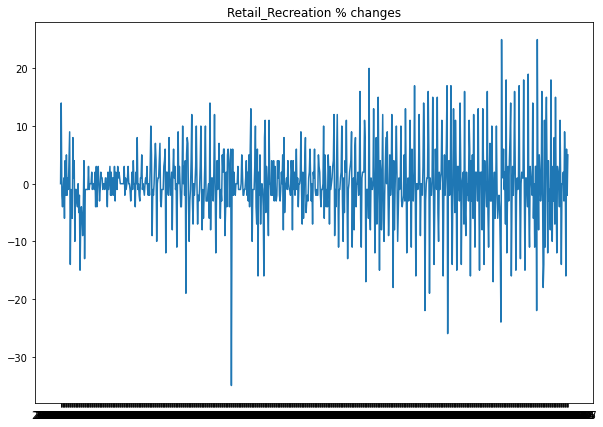

In [20]:
get_ipython().run_line_magic('matplotlib', 'inline')
fig, axes = plt.subplots(figsize=(10,7))
plt.plot(first_diff);
plt.title('Retail_Recreation % changes');

In [21]:
result = adfuller(first_diff, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')   

ADF Statistic: -5.881596938167557
n_lags: 3.069202964850709e-07
p-value: 3.069202964850709e-07
Critial Values:
   1%, -3.4389722010249386
Critial Values:
   5%, -2.8653454308425705
Critial Values:
   10%, -2.5687964010457227


In [22]:
tower=data[data["sub_region_2"] == "London Borough of Tower Hamlets"]


In [23]:
train=tower[(tower["date"] >= "2021-03-01")
        & (tower["date"] <= "2022-02-01")]

In [24]:
test=tower[(tower["date"] > "2022-02-01")]

In [25]:
train.set_index('date',inplace=True)
test.set_index('date',inplace=True)

In [26]:
train.Retail_Recreation

date
2021-03-01   -67.0
2021-03-02   -69.0
2021-03-03   -72.0
2021-03-04   -71.0
2021-03-05   -69.0
              ... 
2022-01-28   -29.0
2022-01-29   -11.0
2022-01-30   -12.0
2022-01-31   -27.0
2022-02-01   -26.0
Name: Retail_Recreation, Length: 338, dtype: float64

In [27]:
train_Recreation=train.Retail_Recreation
test_Recreation=test.Retail_Recreation

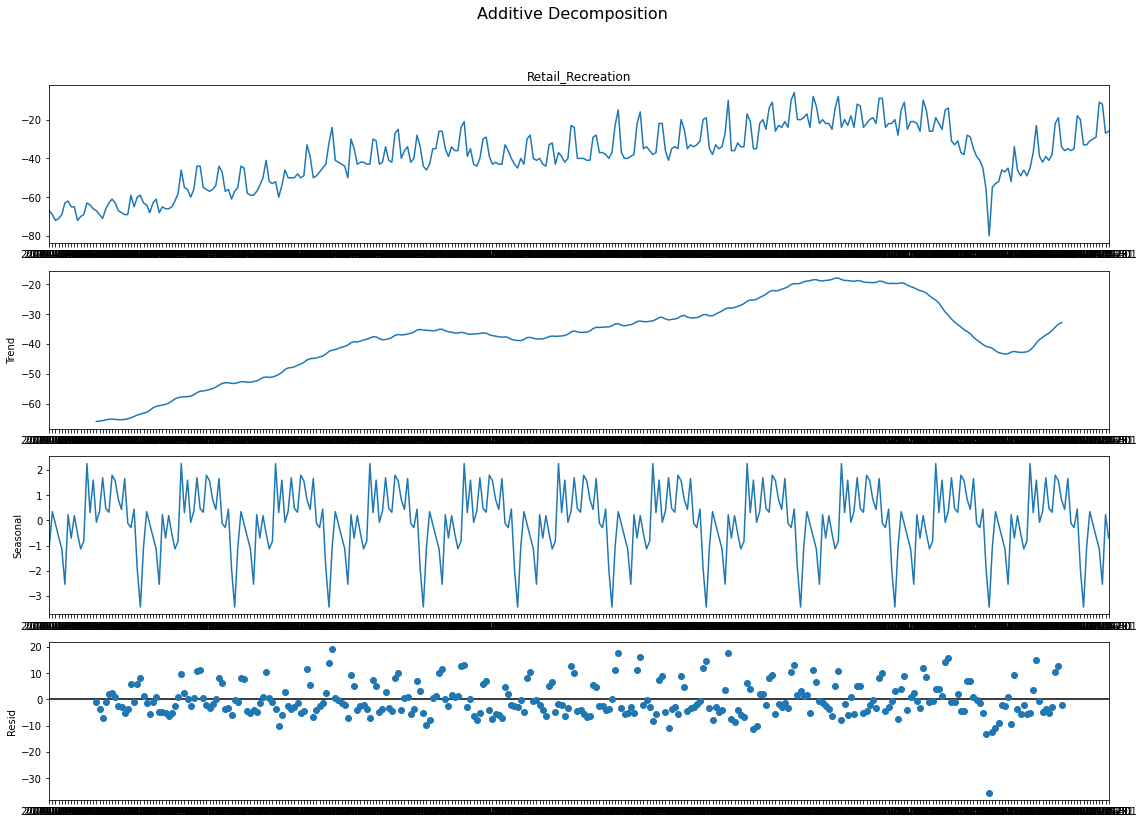

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 


# Additive Decomposition
additive_decomposition = seasonal_decompose(train_Recreation, model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

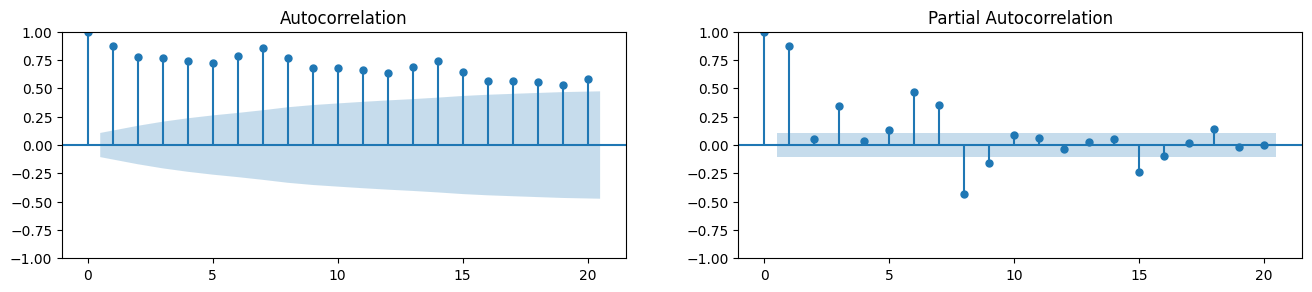

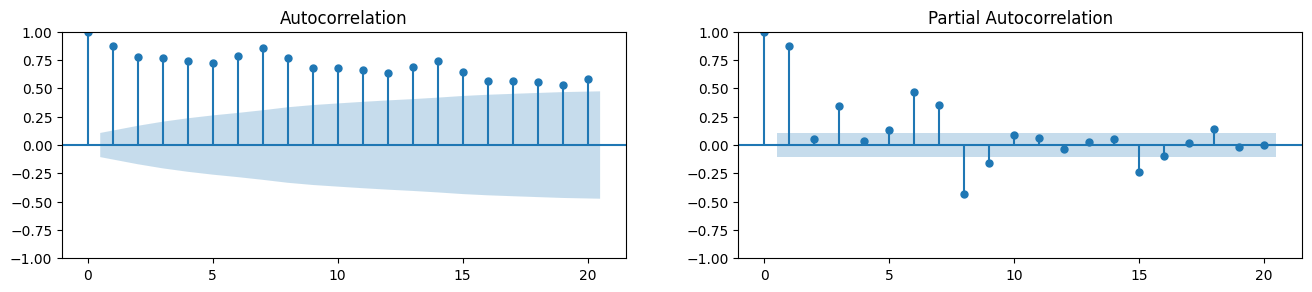

In [45]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(train_Recreation.tolist(), lags=20, ax=axes[0])
plot_pacf(train_Recreation.tolist(), lags=20, ax=axes[1])

PACF is be used to figure out the best order of the AR modeACF is be used to figure out the best order of the MA model.

In [102]:
train_Recreation = train_Recreation.diff()

test_Recreation = test_Recreation.diff()


In [103]:
train_Recreation=train_Recreation[1:]
test_Recreation=test_Recreation[1:]

In [49]:
mod = sm.tsa.arima.ARIMA(train_Recreation, order=(4, 1, 5))
res = mod.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:      Retail_Recreation   No. Observations:                  338
Model:                 ARIMA(4, 1, 5)   Log Likelihood               -1007.424
Date:                Fri, 30 Sep 2022   AIC                           2034.847
Time:                        07:12:53   BIC                           2073.048
Sample:                    03-01-2021   HQIC                          2050.074
                         - 02-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7797      0.017     45.636      0.000       0.746       0.813
ar.L2         -1.4373      0.017    -85.834      0.000      -1.470      -1.404
ar.L3          0.7891      0.014     55.708      0.0

In [71]:
forecast=res.forecast(len(test))

In [72]:
forecast

2022-02-02   -24.624199
2022-02-03   -25.070976
2022-02-04   -24.205030
2022-02-05   -14.551640
2022-02-06   -12.432054
                ...    
2022-04-03   -16.128742
2022-04-04   -24.731438
2022-04-05   -27.365362
2022-04-06   -20.949841
2022-04-07   -20.873826
Freq: D, Name: predicted_mean, Length: 65, dtype: float64

In [65]:
test_Recreation

date
2022-02-02   -25.0
2022-02-03   -26.0
2022-02-04   -30.0
2022-02-05   -11.0
2022-02-06   -16.0
              ... 
2022-04-03   -20.0
2022-04-04   -36.0
2022-04-05   -30.0
2022-04-06   -32.0
2022-04-07   -27.0
Name: actual, Length: 65, dtype: float64

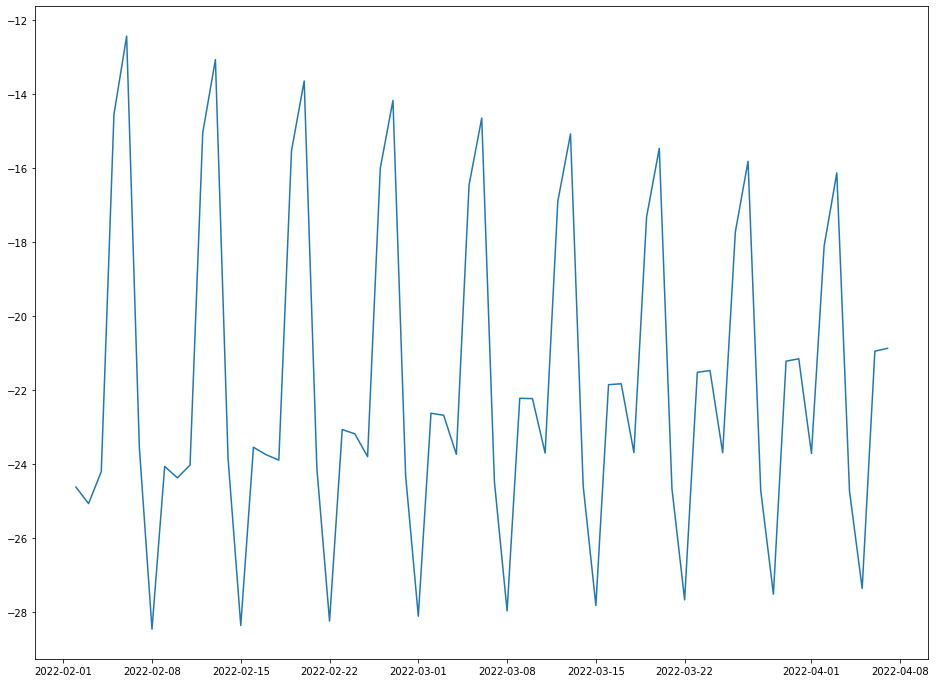

In [73]:
plt.plot(forecast)

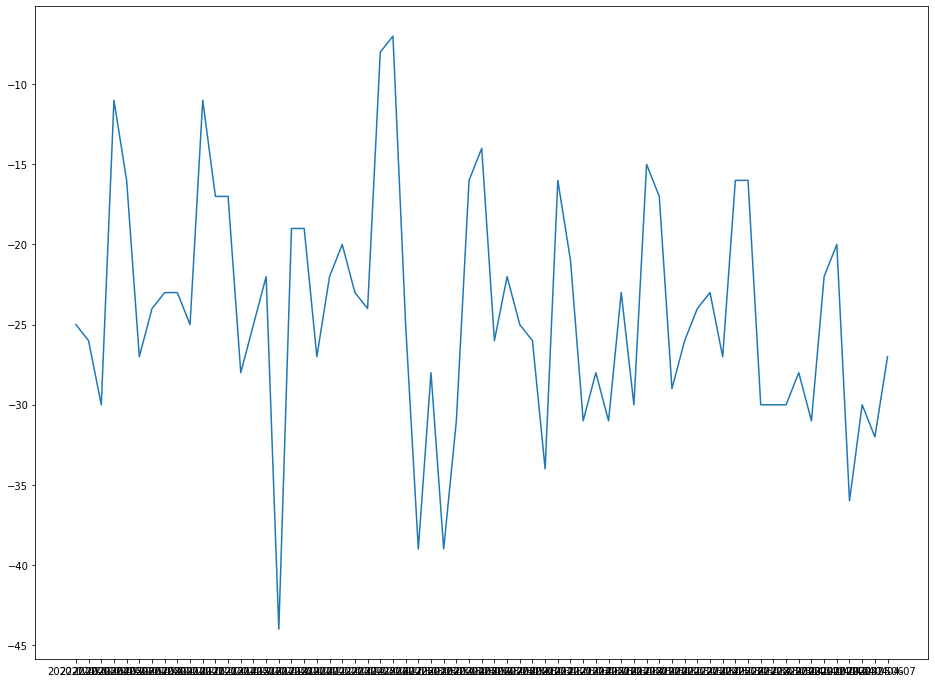

In [74]:
plt.plot(test_Recreation)

In [ ]:
pred_df = forecast_to_df(model, steps = len(test))

In [48]:
from pmdarima.arima import auto_arima
model = auto_arima(train_Recreation, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2233.961, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2332.062, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2329.223, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2297.571, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2330.148, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2235.218, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2234.783, Time=0.10 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2235.243, Time=0.19 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2210.642, Time=0.28 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2223.179, Time=0.22 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2158.266, Time=0.48 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=2134.612, Time=0.47 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=2131.209, Time=0.48 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=2215.323, Time=0.14 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept

ValueError: could not convert string to float: 'GB'